# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [63]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [64]:
df['flag_doente'] = (df['num'] != 0).astype('int64') #1 para doente, sem discriminar o tipo e 0 para saudável
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

A fim de deixar a nossa tabela o mais clara possível, faremos a substituição no nosso df dos valores de 0 e 1, tanto para flag_doente quanto para sexo. Substituindo, em sexo, 0 para masculino e 1 para feminino e em flag_doente, 0 para saudável e 1 para doente. 

In [65]:
# Substituir 0 por 'masc' e 1 por 'fem' na coluna 'sex'
df['sex'] = df['sex'].replace({0: 'masc', 1: 'fem'})
df['flag_doente'] = df['flag_doente'].replace({0: 'saudável', 1: 'doente'})

In [66]:
tab = pd.crosstab(df['sex'], df['flag_doente'], margins= True) #SEX: linhas, FLAG_DOENTE:coluna
tab

flag_doente,doente,saudável,All
sex,,,
fem,114,92,206
masc,25,72,97
All,139,164,303


A primeira parte da nossa tabela está montada, entretanto, ao olhar para a tabela não é possível tirar, rapidamente, nenhuma conclusão mais aprofundada. Proximo passo: verificar o percentual de doentes, esse percentual será separado por sexo, ele analisa o total de mulheres e calcula dessas, quantas estão doentes, o mesmo ocorre com o sexo masculino. 

In [67]:
tab['percentual_doentes'] = tab['doente']/tab['All']
tab

flag_doente,doente,saudável,All,percentual_doentes
sex,,,,
fem,114,92,206,0.553398
masc,25,72,97,0.257732
All,139,164,303,0.458746


Repare que agora, já podemos perceber que o percentual de mulheres doentes é bastante superior ao de homens e que no total, a se pegar qualquer 'amostra' aleatória dentro desse grupo, podendo ser homem ou mulher, temos uma chance de 45,8% de ser uma pessoa doente cardiaca. 

Próximo passo, iremos calcular qual a chance da nossa amostra ser doente, esse calculo será feito da mesma forma que o anterior, primeiro apenas a chance de ser uma mulher doente, depois a chance de ser um homem e ser ou não doente, depois, a chance de ser doente ao se tratar de qualquer amostra aleatória entre todas as amostras coletadas. 

In [68]:
tab['chance_ser_doente'] = tab['doente']/tab['saudável']
tab

flag_doente,doente,saudável,All,percentual_doentes,chance_ser_doente
sex,,,,,
fem,114,92,206,0.553398,1.239130
masc,25,72,97,0.257732,0.347222
All,139,164,303,0.458746,0.847561


No código acima podemos ver que a chance de termos uma mulher doente é 1,23, mais de 3 vezes maior do que de termos um homem doente, enquanto que a chance de se pegar ao aleatóriamente uma pessoa desse grupo seja ela de qualquer sexo é 0,84. 

Próximo passo: Calcular a relação da chance de ser doente de cada sexo em relação à chance de ser doente ao se pegar uma amostra aleatória dentro do total de pessoas. 

In [69]:
tab['RC_vs_All'] = tab['chance_ser_doente']/tab.loc['All','chance_ser_doente'] 
tab

flag_doente,doente,saudável,All,percentual_doentes,chance_ser_doente,RC_vs_All
sex,,,,,,
fem,114,92,206,0.553398,1.239130,1.461996
masc,25,72,97,0.257732,0.347222,0.409672
All,139,164,303,0.458746,0.847561,1.000000


Realmente, podemos concluir que a chance de uma mulher, desse grupo, sofrer com doença cardiáca é muito superior à chance de um homem sofrer com esse problema. Por fim, iremos calcular o log dessa nossa última coluna criada. 

In [83]:
tab['LOG: RC_vs_All'] = np.log(tab['RC_vs_All'])
tab

flag_doente,doente,saudável,All,percentual_doentes,chance_ser_doente,RC_vs_All,LOG: RC_vs_All
sex,,,,,,,
fem,114,92,206,0.553398,1.239130,1.461996,0.379802
masc,25,72,97,0.257732,0.347222,0.409672,-0.892398
All,139,164,303,0.458746,0.847561,1.000000,0.000000


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

Para iniciar, iremos categorizar age em 5 grupos, iremos fazê-lo utilizando o pd.cut:

In [84]:
# Categorize a variável 'age' em 5 grupos
df['age_group'] = pd.cut(df['age'], bins=5)
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,age_group
0,63.0,fem,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,saudável,"(57.8, 67.4]"
1,67.0,fem,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,doente,"(57.8, 67.4]"


Feito isso, vamos criar a nossa tabela que cruza os grupos etários pelo flag_doente:

In [85]:
tab1 = pd.crosstab(df['age_group'], df['flag_doente'], margins= True)
tab1

flag_doente,doente,saudável,All
age_group,,,
"(28.952, 38.6]",3,8,11
"(38.6, 48.2]",21,50,71
"(48.2, 57.8]",41,56,97
"(57.8, 67.4]",67,40,107
"(67.4, 77.0]",7,10,17
All,139,164,303


Como o exercício pede para repetirmos os feitos no exercício anterior, vamos agilizar a escrita de códigos apenas repetindo o já realizado anteriormente:

In [86]:
tab1['chance_ser_doente'] = tab1['doente']/tab1['saudável']
tab1['RC_vs_All'] = tab1['chance_ser_doente']/tab1.loc['All','chance_ser_doente'] 
tab1['LOG: RC_vs_All'] = np.log(tab1['RC_vs_All'])
tab1

flag_doente,doente,saudável,All,chance_ser_doente,RC_vs_All,LOG: RC_vs_All
age_group,,,,,,
"(28.952, 38.6]",3,8,11,0.375000,0.442446,-0.815437
"(38.6, 48.2]",21,50,71,0.420000,0.495540,-0.702108
"(48.2, 57.8]",41,56,97,0.732143,0.863823,-0.146387
"(57.8, 67.4]",67,40,107,1.675000,1.976259,0.681206
"(67.4, 77.0]",7,10,17,0.700000,0.825899,-0.191282
All,139,164,303,0.847561,1.000000,0.000000


Agora nossa tabela está quase completa, falta apenas calcular a média das idades de cada grupo etário. Faremos isso utilizando o groupby:

In [87]:
tab1['idade_média_grupo'] = df.groupby('age_group')['age'].mean()
tab1

flag_doente,doente,saudável,All,chance_ser_doente,RC_vs_All,LOG: RC_vs_All,idade_média_grupo
age_group,,,,,,,
"(28.952, 38.6]",3,8,11,0.375000,0.442446,-0.815437,35.181818
"(38.6, 48.2]",21,50,71,0.420000,0.495540,-0.702108,43.704225
"(48.2, 57.8]",41,56,97,0.732143,0.863823,-0.146387,53.567010
"(57.8, 67.4]",67,40,107,1.675000,1.976259,0.681206,61.775701
"(67.4, 77.0]",7,10,17,0.700000,0.825899,-0.191282,70.529412
All,139,164,303,0.847561,1.000000,0.000000,NaN


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

Farei dois gráficos, contagem de doentes por sexo e por grupo etário. 

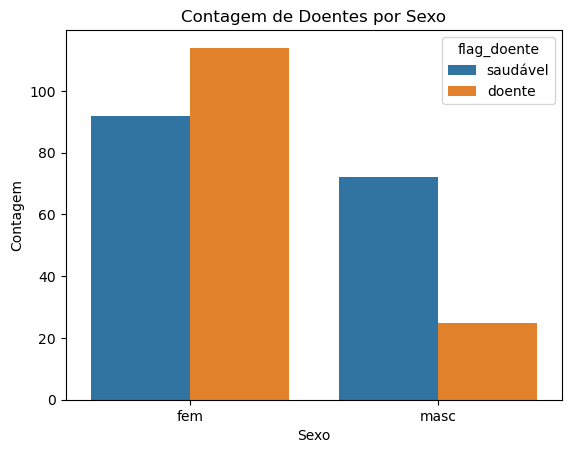

In [92]:
sns.countplot(x='sex', hue='flag_doente', data=df)
plt.title('Contagem de Doentes por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.show()

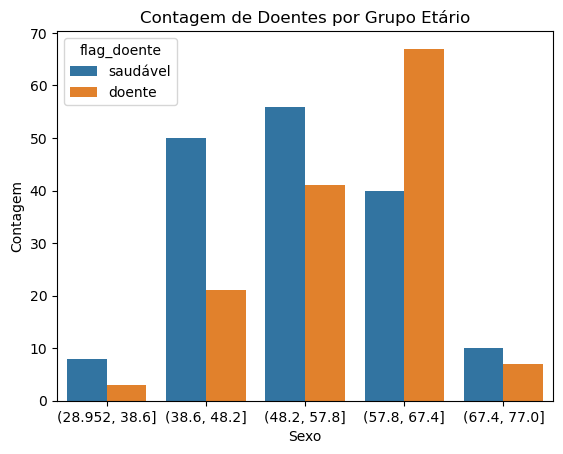

In [93]:
sns.countplot(x='age_group', hue='flag_doente', data=df)
plt.title('Contagem de Doentes por Grupo Etário')
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.show()